Throughout this Notebook CIFAR10 Dataset is used. You can find the dataset in the following link as well.

[CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)|

# Part 1

In this part a Linear Classifier is implemented with the score function of *f(x)=Wx+b* and Mean Squared Error is used as the loss function.


a.   Implement gradient descent and run for 300 epochs

b.   Show the weights matrix W as 10 images.

c.   Report the (initial) learning rate, training and testing loss and accuracies


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
def find_accuracy(pred,labels):
    pred_class = np.argmax(pred, axis=1)
    ground_truth = np.argmax(labels, axis=1)
    accurate_pred = [pred_class == ground_truth]
    return 100*np.sum(accurate_pred)/len(ground_truth)

In [ ]:
def MSE_with_reg(y_pred, ground_truth, batch_size,reg, weights):
  loss = 1./(batch_size*2)*np.square(y_pred-ground_truth).sum() + reg/(batch_size*2)*np.sum([np.sum(w*w) for w in weights])
  return loss;

In [ ]:
def LinearClassifier(batch_size = 50000,val_batch_size=10000, epochs = 300, lr = 0.01, lr_decay = 0.999, reg = 1.2):

  std=1e-5
  w1 = std*np.random.randn(Din, K)
  b1 = np.zeros(K)

  train_loss_history = []
  val_loss_history = []
  train_acc_history = []
  val_acc_history = []
  seed = 0
  rng = np.random.default_rng(seed=seed)

  for epoch in range(1,epochs+1):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    x = x_train[indices]
    y = y_train[indices]

    y_pred = x.dot(w1)+b1

    train_loss = MSE_with_reg(y_pred,y,batch_size,reg,[w1])
    train_loss_history.append(train_loss)
    train_acc = find_accuracy(y_pred, y)
    train_acc_history.append(train_acc)
    
    y_val = x_test.dot(w1) + b1
    val_loss = MSE_with_reg(y_val,y_test,val_batch_size, reg = 0, weights=[])
    val_loss_history.append(val_loss)
    val_acc = find_accuracy(y_val, y_test)
    val_acc_history.append(val_acc)


    dw1 = 1./batch_size*(x.T.dot(y_pred - y)) + 1./batch_size*reg*w1
    w1 -= lr*dw1

    db1 = 1./batch_size*((y_pred-y).sum(axis =0))
    b1 -= lr*db1

    lr *= lr_decay

    if epoch%10 ==0 or epoch == epochs:
      print('Epoch %d/%d: Train Loss: %f, Val Loss: %f,  Training Accuracy: %f, Validation Accuracy: %f'%(epoch, epochs,train_loss, val_loss, train_acc, val_acc))


  return (train_loss_history, val_loss_history, train_acc_history, val_acc_history, w1);


In [ ]:
History = LinearClassifier()

Epoch 0/300: Train Loss: 0.499987, Val Loss: 0.499988,  Training Accuracy: 11.158000, Validation Accuracy: 11.200000
Epoch 10/300: Train Loss: 0.459968, Val Loss: 0.459601,  Training Accuracy: 31.386000, Validation Accuracy: 31.500000
Epoch 20/300: Train Loss: 0.446416, Val Loss: 0.446147,  Training Accuracy: 34.120000, Validation Accuracy: 34.210000
Epoch 30/300: Train Loss: 0.437210, Val Loss: 0.437015,  Training Accuracy: 35.546000, Validation Accuracy: 35.260000
Epoch 40/300: Train Loss: 0.430239, Val Loss: 0.430100,  Training Accuracy: 36.424000, Validation Accuracy: 36.190000
Epoch 50/300: Train Loss: 0.424730, Val Loss: 0.424637,  Training Accuracy: 36.846000, Validation Accuracy: 37.070000
Epoch 60/300: Train Loss: 0.420280, Val Loss: 0.420229,  Training Accuracy: 37.388000, Validation Accuracy: 37.390000
Epoch 70/300: Train Loss: 0.416640, Val Loss: 0.416629,  Training Accuracy: 37.662000, Validation Accuracy: 37.770000
Epoch 80/300: Train Loss: 0.413637, Val Loss: 0.413664,  

In [17]:
mean_train_loss = sum(History[0])/len(History[0])
mean_val_loss =sum(History[1])/len(History[1])
mean_train_acc =sum(History[2])/len(History[2])
mean_val_acc =sum(History[3])/len(History[3])
print('Average Train Loss: %f, Average Val Loss: %f,  Average Training Accuracy: %f, Average Validation Accuracy: %f'%(mean_train_loss, mean_val_loss, mean_train_acc, mean_val_acc))


Average Train Loss: 0.410621, Average Val Loss: 0.410890,  Average Training Accuracy: 38.328870, Average Validation Accuracy: 38.040631


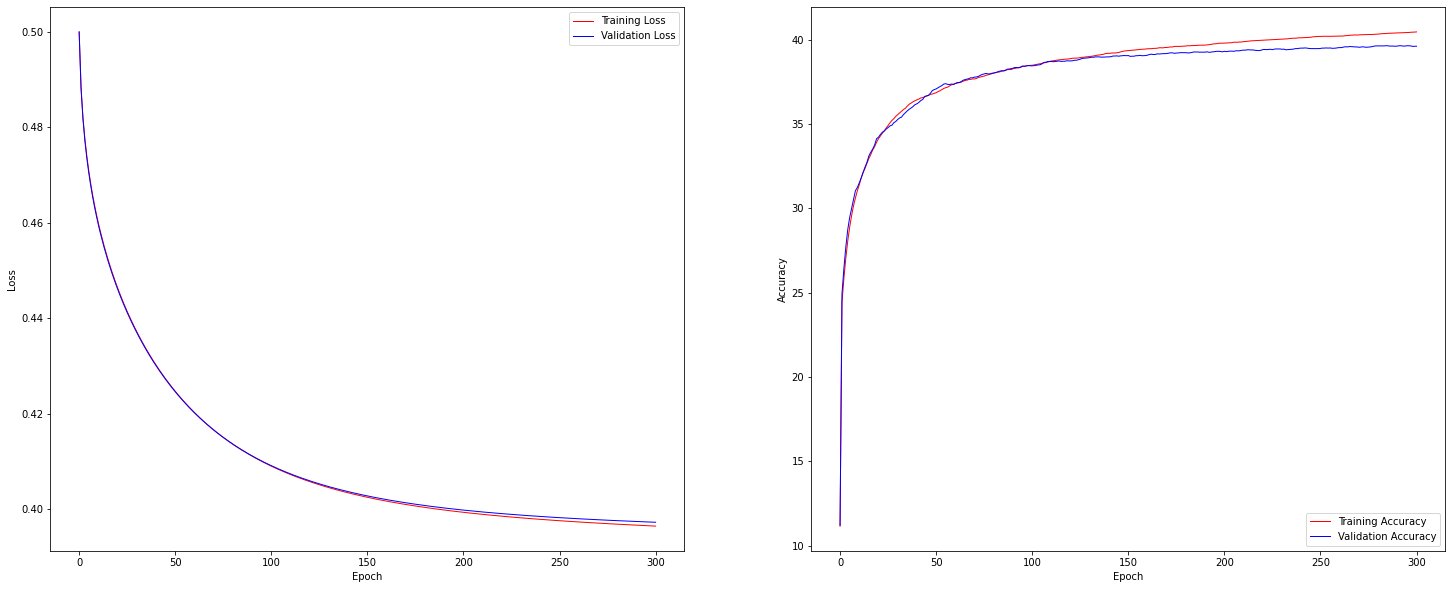

Average Train Loss: 0.410621, Average Val Loss: 0.410890,  Average Training Accuracy: 38.328870, Average Validation Accuracy: 38.040631


In [18]:
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(25,10))
items = {"Training Loss":History[0], "Validation Loss":History[1], "Training Accuracy":History[2], "Validation Accuracy": History[3]}

plt.subplot(1,2,1);
plt.plot(items['Training Loss'], color ='r', linewidth=1, label ='Training Loss');
plt.plot(items['Validation Loss'], color ='b', linewidth=1, label = 'Validation Loss');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend(loc='upper right');

plt.subplot(1,2,2);
plt.plot(items['Training Accuracy'], color ='r', linewidth=1, label ='Training Accuracy');
plt.plot(items['Validation Accuracy'], color ='b', linewidth=1, label = 'Validation Accuracy');
plt.xlabel('Epoch');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.show()


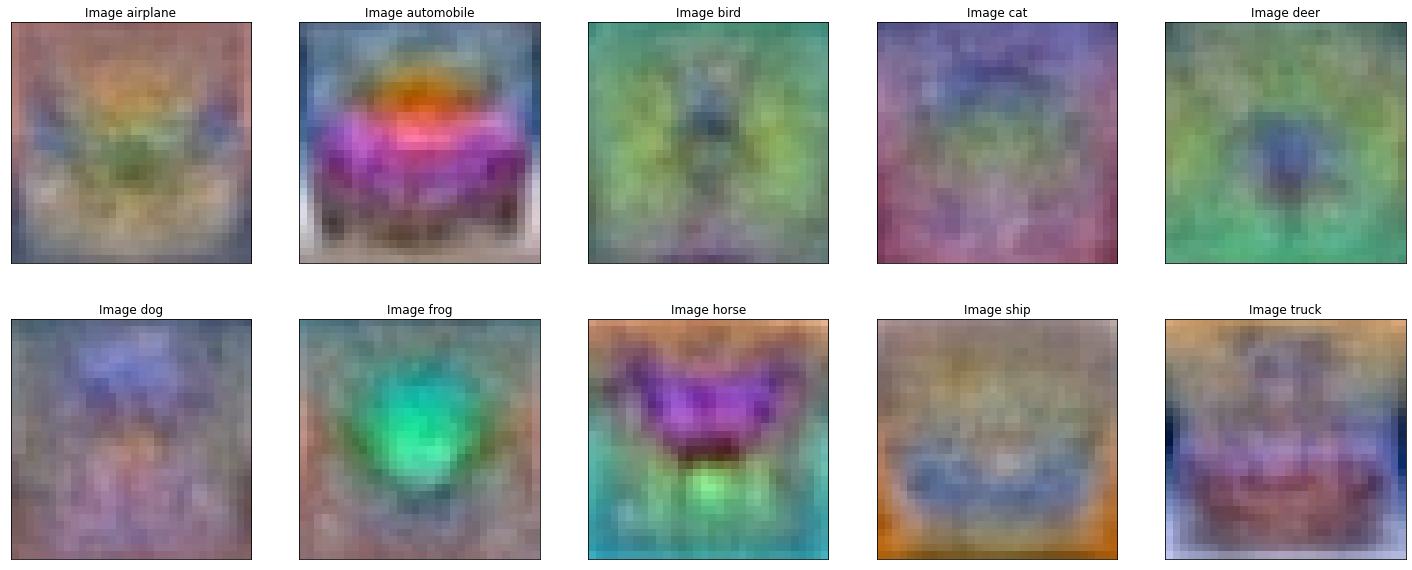

In [ ]:
w1 = History[4]
w1 =  w1- np.min(w1)
images = ((w1/np.max(w1))*255).astype('uint8')
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
j = 1 
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    plt.subplot(2,5,j),plt.imshow(image[:,:,::-1])
    plt.title("Image "+ classes[i]),
    plt.xticks([])
    plt.yticks([])      
    j+=1

plt.show()